In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.constants import golden 

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

ca = pd.read_csv('ComposizioneAcqua.csv', sep = ',', decimal=".", parse_dates=True)
ca

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517
...,...,...,...
1645,Sorgente5,4,5.601863
1646,Sorgente5,4,6.642368
1647,Sorgente5,6,3.134170
1648,Sorgente5,2,12.190175


In [3]:
#2.1 Quanti casi sono presenti nel dataset ?
len(ca)

1650

In [4]:
#2.2 Quanti litri d'acqua sono stati analizzati complessivamente ?
len(ca)*5

8250

In [5]:
#2.3 Quante sono le sorgenti dalle quali sono stati prelevati i campioni d'acqua ?
len(ca['NomeSorgente'].unique())

5

In [6]:
#2.4 Le diverse sorgenti sono rappresentate in modo uniforme nel dataset ?
def gini(series):
    return 1-sum(series.value_counts(normalize=True).map(lambda f: f**2))
def normalized_gini(series):
    s = len(ca['NomeSorgente'].unique())
    return s * gini(series) / (s-1)

normalized_gini(ca['NomeSorgente'])

print('L indice di Gini vicino ad 1 conferma come vi sia un alta eterogeneita.')

0.980257116620753

In [8]:
#2.5 Calcolare la tabella delle frequenze delle particelle d'oro su 5 litri d'acqua
oro_freq = pd.crosstab(index=ca['Oro'], columns = 'Frequenze', colnames = [''])
oro_freq

,Frequenze
Oro,
0,456
1,489
2,328
3,143
4,80
5,63
6,48
7,20
8,12


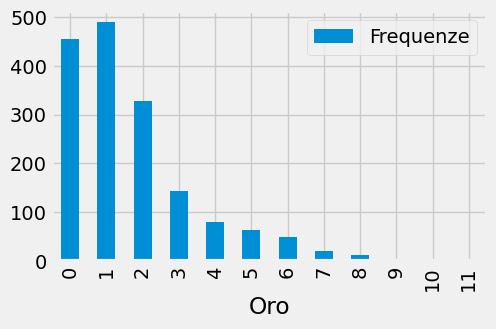

In [18]:
#2.6 Tracciare un grafico opportuno per tali frequenze 
oro_freq.plot.bar()
plt.show()

In [11]:
#2.7 La distribuzione delle frequenze è compatibile con un modello di Poisson ?
print('Si, perchè si ha un andamento dei dati in cui i valori crescono, raggiungono un massimo e poi iniziano a descrescere in modo non lineare.')

Si, perchè si ha un andamento dei dati in cui i valori crescono, raggiungono un massimo e poi iniziano a descrescere in modo non lineare.


In [12]:
#2.8 Stimare numero atteso di particelle di oro riscontrate in 5 litri d'acqua
ca['Oro'].mean()

1.7224242424242424

In [16]:
'''
2.9 Sia X variabile aleatoria che conta il numero di particelle di oro riscontrate in 5 litri d'acqua.
Scrivete lo stimatore usato prima, specificando la numerosità del campione a cui è applicato e dicendo
se è uno stimatore distorto oppure no.
'''
print('Stimatore usato prima: media campionaria')
print('Numerosità campione:', len(ca.dropna()))
print('Lo stimatore usato è uno stimatore non distorto perchè la media campionaria è sempre stimatore non distorto del valore atteso')

Stimatore usato prima: media campionaria
Numerosità campione: 1650
Lo stimatore usato è uno stimatore non distorto perchè la media campionaria è sempre stimatore non distorto del valore atteso
